In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('training_data.csv')

In [ ]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=440833, step=1)

In [ ]:
data.shape

(440833, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
data.isnull
data.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [ ]:
data.dtypes


,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Subscription Type']=le.fit_transform(data['Subscription Type'])
data['Contract Length']=le.fit_transform(data['Contract Length'])


In [ ]:
data.dtypes

,0
CustomerID,float64
Age,float64
Gender,int64
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,int64
Contract Length,int64
Total Spend,float64


In [ ]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [ ]:
data.fillna(data.mean(),inplace=True)

In [ ]:
data.describe()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000
mean,225398.667955,39.373153,0.567684,31.256336,15.807494,3.604437,12.965722,1.013847,0.998489,631.616223,14.480868,0.567107
std,129531.771632,12.442355,0.495403,17.255708,8.586232,3.070214,8.258053,0.813972,0.895777,240.802728,8.596198,0.495476
min,2.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113622.000000,29.000000,0.000000,16.000000,9.000000,1.000000,6.000000,0.000000,0.000000,480.000000,7.000000,0.000000
50%,226125.000000,39.000000,1.000000,32.000000,16.000000,3.000000,12.000000,1.000000,1.000000,661.000000,14.000000,1.000000
75%,337739.000000,48.000000,1.000000,46.000000,23.000000,6.000000,19.000000,2.000000,2.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,2.000000,60.000000,30.000000,10.000000,30.000000,3.000000,3.000000,1000.000000,30.000000,1.000000


In [ ]:
corr_matrix=data.corr()

Text(0.5, 1.0, 'Correlation Matrix')

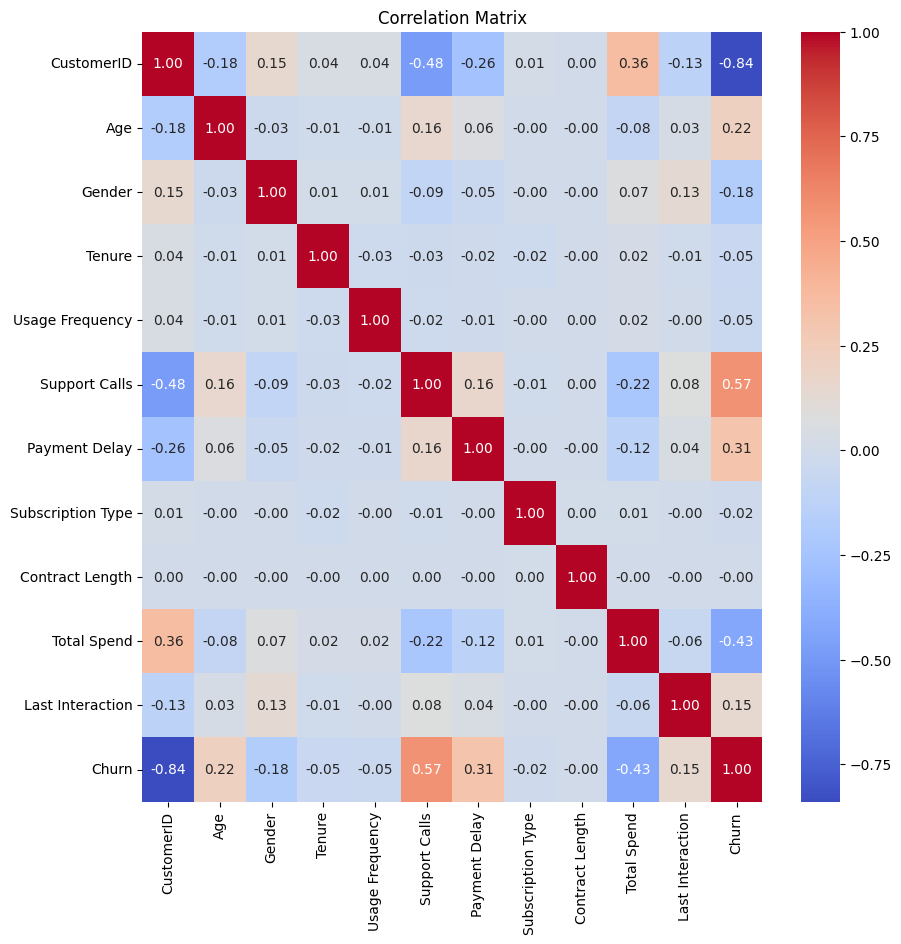

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.title("Correlation Matrix")

In [ ]:
Churn_rate=data['Churn'].value_counts()
Churn_count=data['Churn'].value_counts()
Churn_percentage=data['Churn'].value_counts(normalize=True)*100

In [ ]:
print(Churn_rate)
print(Churn_count)
print(Churn_percentage)

Churn
1.000000    249999
0.000000    190833
0.567107         1
Name: count, dtype: int64
Churn
1.000000    249999
0.000000    190833
0.567107         1
Name: count, dtype: int64
Churn
1.000000    56.710591
0.000000    43.289182
0.567107     0.000227
Name: proportion, dtype: float64


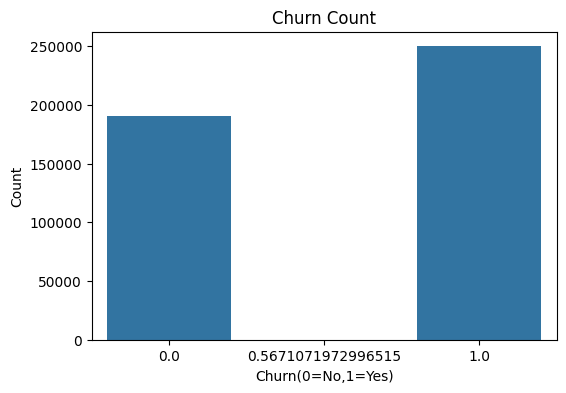

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=data)
plt.title('Churn Count')
plt.xlabel('Churn(0=No,1=Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
print(data.columns)

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [ ]:
print(data['Contract Length'].unique())


[0 1 2 3]


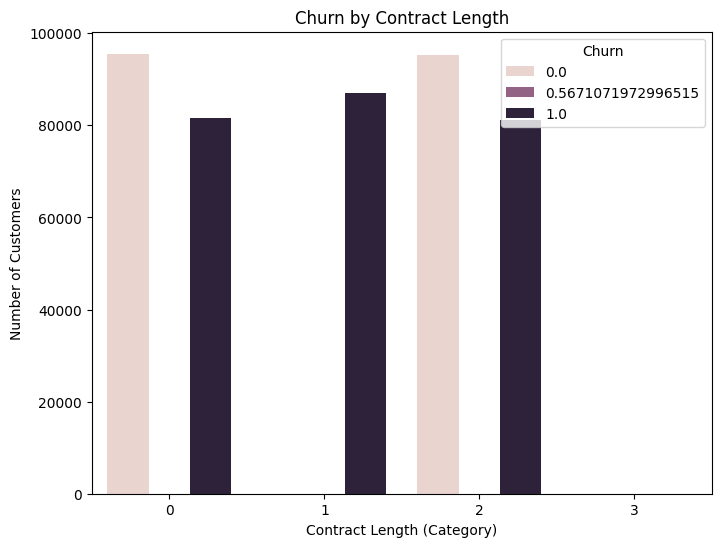

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='Contract Length', hue='Churn', data=data)
plt.title('Churn by Contract Length')
plt.xlabel('Contract Length (Category)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


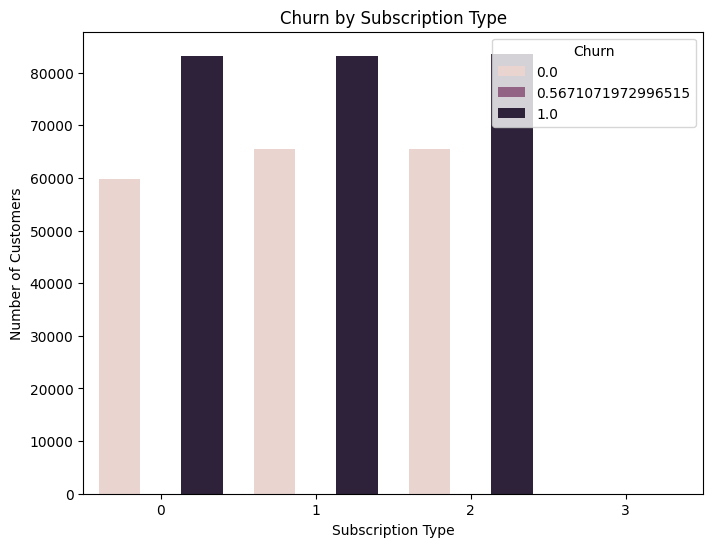

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Subscription Type', hue='Churn', data=data)
plt.title('Churn by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


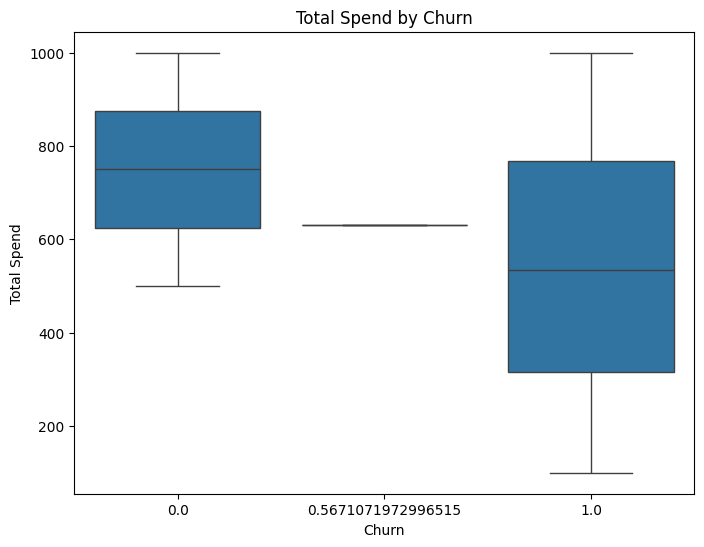

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Total Spend', data=data)
plt.title('Total Spend by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Spend')
plt.show()


In [ ]:
data.to_csv('cleaned_churn_data.csv', index=False)


In [2]:
data.to_csv('cleaned_churn_data.csv', index=False)


NameError: name 'data' is not defined

In [ ]:
data.columns


Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')